### UCI SECOM Dataset


http://archive.ics.uci.edu/ml/datasets/secom

https://www.kaggle.com/paresh2047/uci-semcom

In [73]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Read dataset
data_folder = Path('/content/drive/My Drive/Data_Science/Kaggle/UCI SECOM')

data_X = pd.read_csv(data_folder / 'secom.data.txt', sep = ' ')

data_y = pd.read_csv(data_folder / 'secom_labels.data.txt', sep = ' ')

In [3]:
data_X.head()

,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0,7.9558,414.871,10.0433,0.968,192.3963,12.519,1.4026,-5419,2916.5,-4043.75,751,0.8955,1.773,3.049,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.617,64.2588,49.383,66.3141,86.9555,117.5132,...,12.93,0.78.1,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN.28,NaN.29,NaN.30,NaN.31,NaN.32,NaN.33,NaN.34,NaN.35,533.85,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN.36,NaN.37,NaN.38,NaN.39,0.5005,0.0118,0.0035,2.363,NaN.40,NaN.41,NaN.42,NaN.43
0,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
1,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
2,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
3,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
4,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,0.0055,0.9699,200.4720,0.0,8.6617,414.2426,9.2441,0.9747,191.2280,12.4935,1.3836,-6058.00,2953.75,-3906.50,193.75,0.8930,1.7775,3.0505,62.3778,1.6333,0.1394,3.5200,85.4233,9.6484,50.5795,64.0720,49.4205,66.2949,87.0273,117.4928,...,16.06,1.65,0.5329,7.2448,0.6268,86.9463,3.8960,2.0541,0.9469,0.2900,0.0604,30.6277,254.006,0.8444,4.75,0.1905,1.8784,0.0743,1.8700,22.5598,534.2091,2.3236,8.91,0.3201,2.2598,0.0899,1.6679,13.7755,0.0342,0.0151,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077


In [4]:
data_y.head()

,-1,19/07/2008 11:55:00
0,-1,19/07/2008 12:32:00
1,1,19/07/2008 13:17:00
2,-1,19/07/2008 14:43:00
3,-1,19/07/2008 15:22:00
4,-1,19/07/2008 17:53:00


In [5]:
data_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   -1                   1566 non-null   int64 
 1   19/07/2008 11:55:00  1566 non-null   object
dtypes: int64(1), object(1)
memory usage: 24.6+ KB


In [6]:
print(data_X.shape, data_y.shape)

(1566, 590) (1566, 2)


In [7]:
data_X.describe(include = 'all')

,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0,7.9558,414.871,10.0433,0.968,192.3963,12.519,1.4026,-5419,2916.5,-4043.75,751,0.8955,1.773,3.049,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.617,64.2588,49.383,66.3141,86.9555,117.5132,...,12.93,0.78.1,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN.28,NaN.29,NaN.30,NaN.31,NaN.32,NaN.33,NaN.34,NaN.35,533.85,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN.36,NaN.37,NaN.38,NaN.39,0.5005,0.0118,0.0035,2.363,NaN.40,NaN.41,NaN.42,NaN.43
count,1560.000000,1559.000000,1552.000000,1552.000000,1552.000000,1552.0,1552.000000,1557.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1563.0,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1556.000000,1566.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,...,1306.00000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1565.000000,1565.000000,1565.000000,1565.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,618.000000,618.000000,618.000000,618.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.442333,2495.806517,2200.555574,1396.367124,4.198841,100.0,101.115163,0.121820,1.462838,-0.000852,0.000148,0.964365,199.955222,0.0,9.006042,413.084893,9.907516,0.971446,190.045851,12.481010,1.405056,-5618.521100,2699.239610,-3806.147911,-299.269234,1.204042,1.938583,6.640923,69.502899,2.366417,0.184172,3.673288,85.338709,8.959926,50.582617,64.555977,49.417392,66.221214,86.836501,118.680300,...,17.01644,1.231057,0.276760,7.705381,0.503786,57.760214,4.217631,1.623524,0.994984,0.325636,0.072423,32.278501,262.729683,0.679641,6.444985,0.145610,2.610870,0.060086,2.452417,21.117674,530.521499,2.101830,28.462617,0.345656,9.166210,0.104731,5.566229,16.643443,0.021615,0.016829,0.005396,97.934373,0.500096,0.015320,0.003847,3.068277,0.021458,0.016475,0.005283,99.670066
std,73.644212,80.414961,29.520871,441.833848,56.373659,0.0,6.238591,0.008964,0.073914,0.015115,0.009305,0.012447,3.257712,0.0,2.797364,17.226547,2.404634,0.012066,2.781295,0.218033,0.016742,627.002368,295.541994,1380.590515,2903.497081,0.177486,0.189509,1.241329,3.459723,0.408732,0.032950,0.535479,2.026603,1.344814,1.182996,2.575561,1.182997,0.304229,0.446888,1.807558,...,4.96757,1.361581,0.276324,2.192809,0.599063,35.217566,1.280229,1.871078,0.083880,0.201436,0.051588,19.030447,7.630585,0.121758,2.633583,0.081122,1.032761,0.032761,0.996644,10.213294,17.505124,0.275200,86.330842,0.248556,26.928308,0.067813,16.926489,12.489182,0.011730,0.009640,0.003116,87.520966,0.003405,0.017185,0.003722,3.579132,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,-0.034900,0.655400,182.094000,0.0,2.249300,333.448600,4.469600,0.579400,169.177400,9.877300,1.179700,-7150.250000,0.000000,-9986.750000,-14804.500000,0.000000,0.000000,0.000000,59.400000,0.666700,0.034100,2.069800,83.182900,7.603200,49.834800,63.677400,40.228900,64.919300,84.732700,111.712800,...,6.11000,0.120000,0.018700,2.786000,0.052000,4.826900,1.496700,0.164600,0.891900,0.069900,0.017700,7.236900,242.286000,0.304900,0.970000,0.022400,0.412200,0.009100,0.370600,3.250400,317.196400,0.980200,3.540000,0.066700,1.039500,0.023000,0.663600,4.582000,-0.016900,0.003200,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.255000,2452.215000,2181.024950,1081.875800,1.017700,100.0,97.933350,0.121100,1.411150,-0.010800,-0.005600,0.958100,198.130175,0.0,7.094750,406.126300,9.567150,0.968250,188.299750,

In [8]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Columns: 590 entries, 3030.93 to NaN.43
dtypes: float64(590)
memory usage: 7.0 MB


In [9]:
data_X.isnull().sum()

3030.93       6
2564          7
2187.7333    14
1411.1265    14
1.3602       14
             ..
2.363         1
NaN.40        0
NaN.41        0
NaN.42        0
NaN.43        0
Length: 590, dtype: int64

In [10]:
list_of_NaN = data_X.isnull().sum()
list_of_NaN.values

array([   6,    7,   14,   14,   14,   14,   14,    9,    2,    2,    2,
          2,    2,    3,    3,    3,    3,    3,    3,   10,    0,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    1,
          1,    1,    1,    1,    1,    1,    1,   24,   24,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    4,    4,
          4,    4,    4,    4,    7,    6,    6,    6,    7,    7,    7,
          6,    6,    6,    6,    6,    6,  793,  793,    6,   24,   24,
         24,   24,   24,   24,   24,   24,    1,   12, 1340,    0,    0,
          0,   51,   51,    6,    2,    2,    6,    6,    6,    6,    6,
          6,    6,    6,    6,    2,    2,    6,    6,    6,    6, 1017,
       1017, 1017,  714,    0,    0,    0,    0,    0,   24,    0,    0,
          9,    9,    9,    9,    9,    9,    9,    9,    9,    9,    9,
          8,    8,    8,    5,    6,    7,   14,   14,   14,   14,   14,
          9,    2,    2,    2,    2,    2,    3,   

In [11]:
data_X.columns

Index(['3030.93', '2564', '2187.7333', '1411.1265', '1.3602', '100', '97.6133',
       '0.1242', '1.5005', '0.0162',
       ...
       'NaN.38', 'NaN.39', '0.5005', '0.0118', '0.0035', '2.363', 'NaN.40',
       'NaN.41', 'NaN.42', 'NaN.43'],
      dtype='object', length=590)

In [16]:
data_y.head()

,-1,19/07/2008 11:55:00
0,-1,19/07/2008 12:32:00
1,1,19/07/2008 13:17:00
2,-1,19/07/2008 14:43:00
3,-1,19/07/2008 15:22:00
4,-1,19/07/2008 17:53:00


In [17]:
data_X.isnull().sum()

3030.93       6
2564          7
2187.7333    14
1411.1265    14
1.3602       14
             ..
2.363         1
NaN.40        0
NaN.41        0
NaN.42        0
NaN.43        0
Length: 590, dtype: int64

In [18]:
# Replace 'NaN' with mean of the columns

data_X = data_X.fillna(data_X.mean())

In [19]:
data_X.isnull().sum()

3030.93      0
2564         0
2187.7333    0
1411.1265    0
1.3602       0
            ..
2.363        0
NaN.40       0
NaN.41       0
NaN.42       0
NaN.43       0
Length: 590, dtype: int64

In [20]:
# Change DataFrame to numpy

X = data_X.values
y = data_y.iloc[:, 0].values

In [21]:
# Handling missing data
# imputer = SimpleImputer(missing_values = 'NaN', strategy = 'mean')                        
# imputer = imputer.fit(X)
# X = imputer.transform(X)

In [22]:
# Splitting the dataset into Training and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1331, 590) (235, 590) (1331,) (235,)


In [24]:
# Feature Scaling

stand_scale_X = StandardScaler()
X_train = stand_scale_X.fit_transform(X_train)
X_test = stand_scale_X.fit_transform(X_test)

# Logistic Regression

In [25]:
log_clf = LogisticRegression(max_iter = 1000, random_state = 42)
log_clf.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
log_pred = log_clf.predict(X_test)

In [27]:
log_cm = confusion_matrix(y_test, log_pred)
log_cm_report = classification_report(y_test, log_pred)

print(log_cm)
print(log_cm_report)

[[201  17]
 [ 15   2]]
              precision    recall  f1-score   support

          -1       0.93      0.92      0.93       218
           1       0.11      0.12      0.11        17

    accuracy                           0.86       235
   macro avg       0.52      0.52      0.52       235
weighted avg       0.87      0.86      0.87       235



In [28]:
print('Training Accuracy :', log_clf.score(X_train, y_train))
print('Test Accuracy :', log_clf.score(X_test, y_test))

Training Accuracy : 0.9924868519909842
Test Accuracy : 0.8638297872340426


# Random Forest

In [29]:
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs =-1)
rf_clf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [30]:
# rf_pred = rf_clf.predict(X_test)

In [31]:
# rf_cm = confusion_matrix(y_test, rf_pred)
# rf_cm_report = classification_report(y_test, rf_pred)

# print(rf_cm)
# print(rf_cm_report)

In [32]:
# print('Training Accuracy :', rf_clf.score(X_train, y_train))
# print('Test Accuracy :', rf_clf.score(X_test, y_test))

In [33]:
# Feature Imporatance
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = rf_clf.feature_importances_
indices = np.argsort(importances)[: :-1]

# for f in range(X.shape[1]):
#   print('%d. Features %d (%f' % (f+1, indices[f], importances[indices[f]]))

for f in range(20):
  print('{}. feature {}, {:.4f}'.format(f+1, indices[f], importances[indices[f]]))

1. feature 64, 0.0147
2. feature 59, 0.0088
3. feature 426, 0.0086
4. feature 153, 0.0074
5. feature 152, 0.0066
6. feature 562, 0.0064
7. feature 441, 0.0063
8. feature 267, 0.0063
9. feature 25, 0.0062
10. feature 477, 0.0062
11. feature 65, 0.0060
12. feature 2, 0.0058
13. feature 40, 0.0057
14. feature 475, 0.0057
15. feature 539, 0.0055
16. feature 71, 0.0051
17. feature 288, 0.0051
18. feature 573, 0.0051
19. feature 197, 0.0050
20. feature 341, 0.0050


In [34]:
np.sort(-importances)

array([-1.47387032e-02, -8.84228511e-03, -8.56386030e-03, -7.37786483e-03,
       -6.61023537e-03, -6.39349666e-03, -6.29235907e-03, -6.28136681e-03,
       -6.23751510e-03, -6.20663703e-03, -5.99123523e-03, -5.82194455e-03,
       -5.71542488e-03, -5.67498789e-03, -5.45804738e-03, -5.11835682e-03,
       -5.08335840e-03, -5.07029008e-03, -5.01792119e-03, -5.01162202e-03,
       -4.95340629e-03, -4.78463313e-03, -4.53832838e-03, -4.51258881e-03,
       -4.50638844e-03, -4.49125744e-03, -4.45532225e-03, -4.24781788e-03,
       -4.23847939e-03, -4.19147813e-03, -4.18520444e-03, -4.06407112e-03,
       -4.02854118e-03, -4.00273177e-03, -3.99723690e-03, -3.97345837e-03,
       -3.94667991e-03, -3.91711590e-03, -3.88752121e-03, -3.82307422e-03,
       -3.81191633e-03, -3.80321297e-03, -3.78913786e-03, -3.74930930e-03,
       -3.71593332e-03, -3.70530830e-03, -3.70101962e-03, -3.68782466e-03,
       -3.64762106e-03, -3.63771119e-03, -3.56931302e-03, -3.55869770e-03,
       -3.55762652e-03, -

In [35]:
indices

array([ 64,  59, 426, 153, 152, 562, 441, 267,  25, 477,  65,   2,  40,
       475, 539,  71, 288, 573, 197, 341, 348, 211, 156, 102, 287, 299,
       132,  16, 437, 349, 166, 205,  93,  78, 430, 154, 354, 210, 282,
       200, 435,  63,  77, 301, 582, 363, 433, 493, 352,  88, 519, 473,
        62, 150, 386, 359, 554,  55, 117, 494,  27, 550, 411, 406, 584,
       429, 476,  80,   0, 425, 331, 212,  21, 227,  33, 520, 103,  70,
        28, 525, 350, 104, 577, 188, 423, 553,  67, 575,  41, 387, 324,
       510, 551, 144, 317,  72, 469,  51, 124, 159, 339,  45, 203, 100,
       556,  76, 332, 217,  61,  99, 147, 467, 353, 557,  75, 303, 316,
       238, 436, 576, 119, 388, 297, 335,  19,  10, 472,  38, 107, 123,
       427,  43, 163, 412, 130, 456, 304, 583, 292, 148, 145,  11, 468,
        47, 202, 344, 239,  26, 558, 487, 300, 164,  22, 567, 270, 559,
       283, 302, 570,  73, 405, 138, 131, 585,  37,  29, 569, 160, 199,
       571, 333,  87, 480, 365, 285, 219, 222, 323,  48, 207, 34

<BarContainer object of 590 artists>

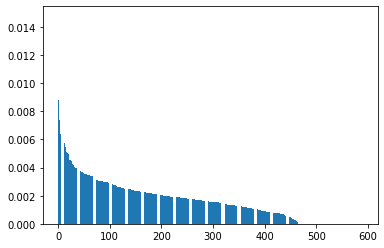

In [36]:
plt.figure()
plt.bar(range(X.shape[1]), importances[indices])

#Low Variance

In [37]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
#https://stackoverflow.com/questions/29298973/removing-features-with-low-variance-using-scikit-learn
threshold_n = 0.85
low_var = VarianceThreshold(threshold = (threshold_n) * (1-threshold_n))

X_lv = low_var.fit_transform(X)
print(X_lv.shape)

(1566, 269)


In [38]:
# Splitting the dataset into Training and Test

X_train, X_test, y_train, y_test = train_test_split(X_lv, y, test_size = 0.15, random_state = 42)

In [39]:
# Feature Scaling

stand_scale_X = StandardScaler()
X_train = stand_scale_X.fit_transform(X_train)
X_test = stand_scale_X.fit_transform(X_test)

In [40]:
lv_clf = LogisticRegression(max_iter = 1000, random_state = 42)
lv_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# Confusion Matrix on training set

tr_pred = lv_clf.predict(X_train)
cm_training_tr = confusion_matrix(y_train, tr_pred)
lv_cm_report_tr = classification_report(y_train, tr_pred)
print(cm_training_tr)
print(lv_cm_report_tr)

[[1243    1]
 [  53   34]]
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98      1244
           1       0.97      0.39      0.56        87

    accuracy                           0.96      1331
   macro avg       0.97      0.70      0.77      1331
weighted avg       0.96      0.96      0.95      1331



In [42]:
# Confusion Matrix on test set

te_pred = lv_clf.predict(X_test)
cm_training_te = confusion_matrix(y_test, te_pred)
lv_cm_report_te = classification_report(y_test, te_pred)
print(cm_training_te)
print(lv_cm_report_te)

[[195  23]
 [ 14   3]]
              precision    recall  f1-score   support

          -1       0.93      0.89      0.91       218
           1       0.12      0.18      0.14        17

    accuracy                           0.84       235
   macro avg       0.52      0.54      0.53       235
weighted avg       0.87      0.84      0.86       235



In [43]:
print('Training Accuracy :', lv_clf.score(X_train, y_train))
print('Test Accuracy :', lv_clf.score(X_test, y_test))

Training Accuracy : 0.9594290007513148
Test Accuracy : 0.8425531914893617


# Support Vector Classification

# PCA (Principal Component Analysis)
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [62]:
# Splitting the dataset into Training and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [63]:
# Feature Scaling

stand_scale_X = StandardScaler()
X_train = stand_scale_X.fit_transform(X_train)
X_test = stand_scale_X.fit_transform(X_test)

In [64]:
# Reduce features to 50 only

pca = PCA(n_components = 50)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [65]:
print(X_train.shape, X_test.shape)

(1174, 50) (392, 50)


In [66]:
pca_clf = LogisticRegression(random_state = 42)
pca_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
pca_pred_tr = pca_clf.predict(X_train)
cm_pca_tr = confusion_matrix(y_train, pca_pred_tr)
print(cm_pca_tr)

[[1093    2]
 [  76    3]]


In [68]:
pca_pred_te = pca_clf.predict(X_test)
cm_pca_te = confusion_matrix(y_test, pca_pred_te)
print(cm_pca_te)

[[363   4]
 [ 23   2]]


In [69]:
print('Training Accuracy :', pca_clf.score(X_train, y_train))
print('Test Accuracy :', pca_clf.score(X_test, y_test))

Training Accuracy : 0.9335604770017035
Test Accuracy : 0.9311224489795918


# Linear SVC

In [82]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# Similar to SVC with kernel = linear

lsvc = LinearSVC(penalty = 'l1', C = 0.01, dual=False)
lsvc.fit(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

In [83]:
# SelectFromModel will select features based on important weights.
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

lsvc_model = SelectFromModel(lsvc, prefit = True)
X_lsvc = lsvc_model.transform(X)

In [84]:
X_lsvc.shape

(1566, 106)

In [85]:
# Splitting the dataset into Training and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [86]:
# Feature Scaling

stand_scale_X = StandardScaler()
X_train = stand_scale_X.fit_transform(X_train)
X_test = stand_scale_X.fit_transform(X_test)

In [87]:
lsvc_clf = LogisticRegression(max_iter = 1000, random_state = 42)
lsvc_clf.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
lsvc_pred = log_clf.predict(X_test)

In [89]:
lsvc_cm = confusion_matrix(y_test, lsvc_pred)
lsvc_cm_report = classification_report(y_test, lsvc_pred)

print(lsvc_cm)
print(lsvc_cm_report)

[[343  24]
 [ 18   7]]
              precision    recall  f1-score   support

          -1       0.95      0.93      0.94       367
           1       0.23      0.28      0.25        25

    accuracy                           0.89       392
   macro avg       0.59      0.61      0.60       392
weighted avg       0.90      0.89      0.90       392



In [90]:
print('Training Accuracy :', lsvc_clf.score(X_train, y_train))
print('Test Accuracy :', lsvc_clf.score(X_test, y_test))

Training Accuracy : 1.0
Test Accuracy : 0.8596938775510204


# AutoEncoder

In [43]:
# Apply AutoEncoder from Deep Learning for dimentional reduction
# Using Keras and TensorFlow 2

